# Niezawodność systemów

Jak relacje między elemenatami wpływają na niezawodność systemu?

R(t) - jakie jest prawdopodobieństwo ze jakiś element przezyje

F(t) - jakie jest prawdopodobieństwo ze dany element sie zepsuje

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Zad. 1. 
System o szeregowej strukturze niezawodnosciowel sklada sie z 3 elementów. 

Dla rozpatrywanego czasu t (np. 2 lata) niezawodnosc kazdego z jego elementów wynosi odpowiednio: R1=0,95, R2=0,92, R3=0,9. Uzupełnij zdania.:
Niezawodnosc systemu wynosi 0.7866



In [8]:
probs = np.array(
    [
        0.95,
        0.92,
        0.9,
    ]
)
probs

array([0.95, 0.92, 0.9 ])

In [10]:
probs.prod()

0.7866

In [20]:
1 - probs.prod()

0.21340000000000003

Dla 100 takich systemów, ok. `21,34` z nich przypuszczalnie stanie sie niezdatna w rozpatrywanym czasie.
Gdyby system cechowal sie równolegla struktura niezawodnosciowa, jego niezawodnosé wynositaby `0.9996`.

In [16]:
niezapd = pd.DataFrame(probs, columns=["niezawodnosc"])
niezapd

,niezawodnosc
0,0.95
1,0.92
2,0.90


In [19]:
1-(1-niezapd['niezawodnosc']).prod()

0.9996

## Zad. 2.
System sklada sie z n jednakowych elementów. Dla rozpatrywanego czasu t, niezawodnosé kazdego z nich wynosi 0,75. Rozpatrz rózne liczbe elementów (od 2 do 10) i zbadaj zaleznosé niezawodnosci systergu od liczbv iego elementów skladowych. Uzupelnij tabele, narysuj wykresy i uzupeinij zdania.
- (a) system o szeregowej strukturze niezawodnosciowej (tabela+wykres+komentarz)

Wraz ze wzrostem liczby elementów, niezawodnosé systemu o strukturze szeregowej niezawodność systemu spada


In [30]:
df = pd.DataFrame(np.array([0.75] * 10), columns=["r"])
df["invr"] = 1 - df["r"]
df

,r,invr
0,0.75,0.25
1,0.75,0.25
2,0.75,0.25
3,0.75,0.25
4,0.75,0.25
5,0.75,0.25
6,0.75,0.25
7,0.75,0.25
8,0.75,0.25
9,0.75,0.25


In [32]:
df.cumprod()

,r,invr
0,0.750000,2.500000e-01
1,0.562500,6.250000e-02
2,0.421875,1.562500e-02
3,0.316406,3.906250e-03
4,0.237305,9.765625e-04
5,0.177979,2.441406e-04
6,0.133484,6.103516e-05
7,0.100113,1.525879e-05
8,0.075085,3.814697e-06
9,0.056314,9.536743e-07


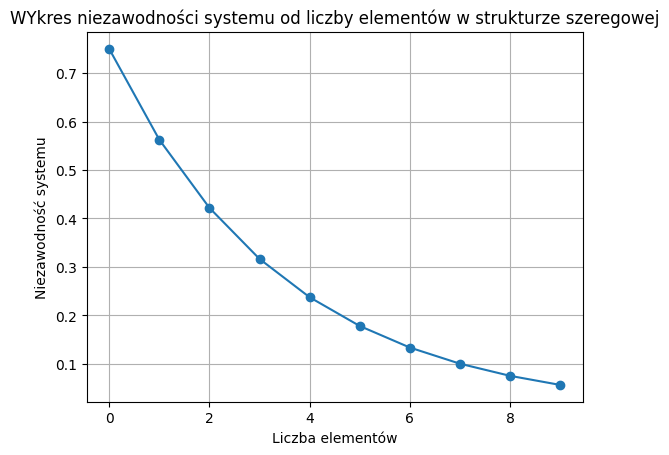

In [35]:
plt.plot(df["r"].cumprod(), 'o-')
plt.grid(True)
plt.xlabel("Liczba elementów")
plt.ylabel("Niezawodność systemu")
plt.title("WYkres niezawodności systemu od liczby elementów w strukturze szeregowej")
plt.show()

- (b) system o równolegtej strukturze niezawodnosciowej (tabela+wykres+komentarz)
    - tabela i wykres zgodnie z przyktadem z podpunktu a
Wraz ze wzrostem liczby elementów, niezawodnosé systemu o strukturze równoleglej wzrasta wraz z liczba elementow

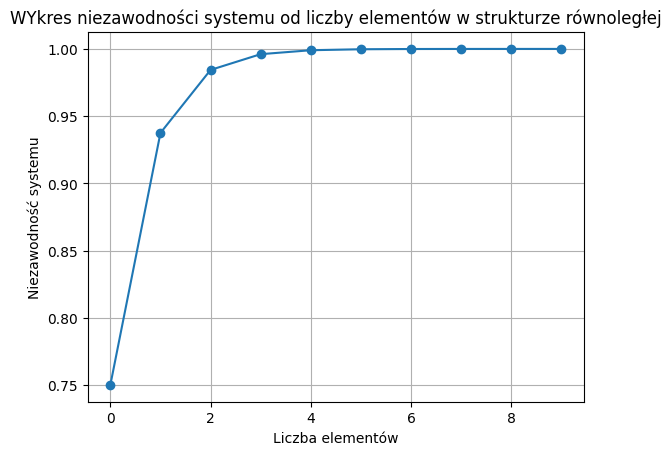

In [36]:
plt.plot(1 - df["invr"].cumprod(), "o-")
plt.grid(True)
plt.xlabel("Liczba elementów")
plt.ylabel("Niezawodność systemu")
plt.title("WYkres niezawodności systemu od liczby elementów w strukturze równoległej")
plt.show()

## Zad. 3.
Wyznacz niezawodnosé systemu majacego strukture przedstawiona na schemacie ponizej. Dla rozpatrywanego
czasu t, niezawodnosé poszczególnych elementów wynosi: R,=0,5,F2=0,7, Fg=0,85, R,=0,9, Rg=0,95.
Niezawodnosé systemu wynosi UZUPELNIC. [Prawidtowy wynik to ok.0,72)
Dla 100 takich systemów, UZUPELNIC z nich przypuszczalnie bedzie zdatna po czasie t

# II. ZADANIA cz.2
## Zad. 4. 
System sktada sie z 6 jednakowych elementów. Rozpatrz strukture szeregowo-równolegta i równolegto-szeregowa
(dwa takie same podsystemy i kazdy z trzema identycznymi elementami, pomocniczy rysunek ponizej). Porównaj
niezawodnosé systemu dla jednej i drugiej struktury przyjmujac rózna niezawodnosé elementów sktadowych. Przyktad:
Kazdy element ma niezawodnosé 0,3. Licze niezawodnosc systemu dla jednej i drugiej struktury.
ZAWODNOSC SYSTEMU Rs(t)
wrownole ia (struktura rownolegio-Szereg
prawidtowy wynik: 0,05
tabela+wykres+komentarz
Systemy o strukturze UZUPELNIÉ sa bardziej niezawodne.
RÓWNOLEGLO-SZEREGOWA


## Zad. 5.
System cechuje sie struktura progowe 2z3 (przynaimniej 2 23 elementów musze byó zdatne). Sktada sie z trzech
takich samych elementów, kazdy ma niezawodnosé 0,7. Oblicz niezawodnost systemu.
[mozna obliczyé na kartce]
Niezawodnosé systemu wynosi UZUPELNIC